<a href="https://colab.research.google.com/github/frank-lacriola/Data-Science-Lab/blob/main/Lab10_Clustering_over_Chameleon_and_20_Newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2D_gauss_clusters.txt

--2021-12-28 16:01:28--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2D_gauss_clusters.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70004 (68K) [text/plain]
Saving to: ‘2D_gauss_clusters.txt’

2D_gauss_clusters.t 100%[===================>]  68.36K  --.-KB/s    in 0.007s  

2021-12-28 16:01:28 (10.1 MB/s) - ‘2D_gauss_clusters.txt’ saved [70004/70004]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/2D_gauss_clusters.csv")

In [6]:
df.head()

,x,y
0,845753,636607
1,812954,643720
2,868217,609046
3,920248,607272
4,841621,639394


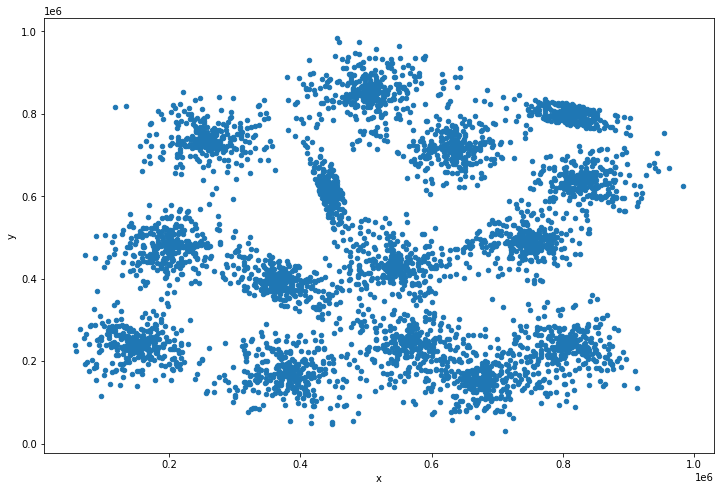

In [7]:
ax = df.plot.scatter(x='x', y='y', figsize=(12,8))

Let's normalize data (min-max):

In [8]:
df_min_max_scaled = df.copy()
for column in df.columns:
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    


In [9]:
class KMeans:
  def __init__(self, n_clusters, max_iter=100, distance_metric='euclidean'):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
    self.labels = None
    self.distance_metric = distance_metric


  def fit_predict(self, X):
    """Run the K-means clustering on X.
    :param X: input data points, array, shape = (N,C).
    :return: labels : array, shape = N.
    """
    self.centroids = np.random.rand(self.n_clusters, 2)
    for _ in range(self.max_iter):
      labels = []
      for i in range(X.shape[0]):
        labels.append(self.assign_label(X[i]))

      # Let's update centroids
      for j in range(self.centroids.shape[0]):
        mask = []
        for k in range(len(labels)):
          if labels[k] == j:
            mask.append(k)
        self.centroids[j] = [X[mask, 0].mean(), X[mask, 1].mean()]

    self.labels = labels
    return self.labels, self.centroids


  def assign_label(self, X):
    #print(np.argmin(self.compute_distance(X)))
    return np.argmin(self.compute_distance(X))


  def compute_distance(self, X):
    distances = []
    for j in range(self.centroids.shape[0]):
      if self.distance_metric=='euclidean':
        # calculating Euclidean distance
        # using linalg.norm()
        point1 = X
        point2 = self.centroids[j]
        distances.append(np.linalg.norm(point1 - point2))
             
    return np.array(distances)
      

km = KMeans(n_clusters=15, max_iter=100)

In [10]:
labels, centroids = km.fit_predict(X=df_min_max_scaled.to_numpy())

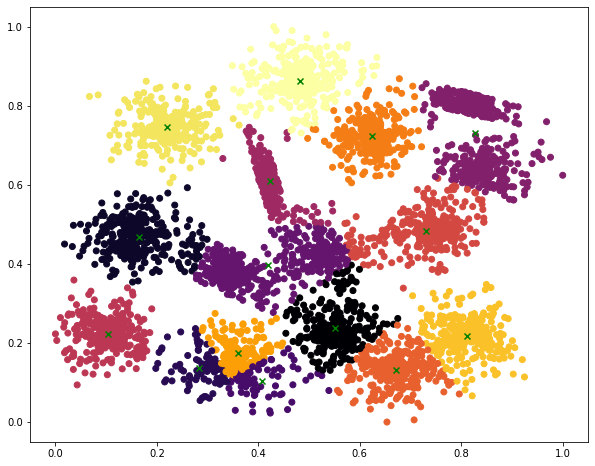

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.scatter(x=df_min_max_scaled['x'], y=df_min_max_scaled['y'], c=labels, cmap="inferno")
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='green')

Let's try kMeans over Chameleon dataset:


In [12]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/chameleon_clusters.txt

--2021-12-28 16:03:36--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/chameleon_clusters.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172922 (169K) [text/plain]
Saving to: ‘chameleon_clusters.txt’

chameleon_clusters. 100%[===================>] 168.87K  --.-KB/s    in 0.02s   

2021-12-28 16:03:37 (10.3 MB/s) - ‘chameleon_clusters.txt’ saved [172922/172922]



In [14]:
df = pd.read_csv("/content/chameleon_clusters.csv")

In [15]:
df_min_max_scaled = df.copy()
for column in df.columns:
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

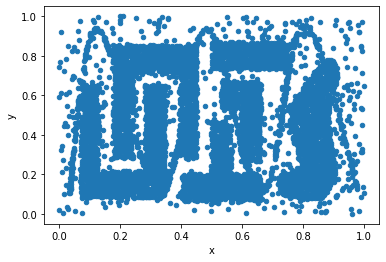

In [16]:
df_min_max_scaled.plot.scatter(x='x',y='y')

In [17]:
km = KMeans(n_clusters=6, max_iter=200)
labels, centroids = km.fit_predict(X=df_min_max_scaled.to_numpy())

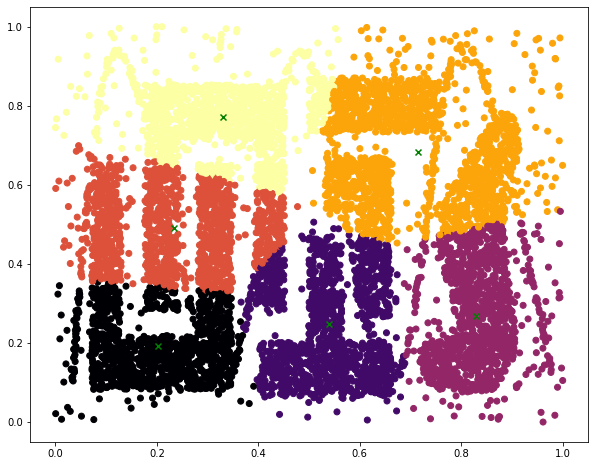

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.scatter(x=df_min_max_scaled['x'], y=df_min_max_scaled['y'], c=labels, cmap="inferno")
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='green')

# 2.2: Clustering evaluation

In [37]:
def silhouette_samples(X, labels):
  """Evaluate the silhouette for each point and return them as a list.
  :param X: input data points, array, shape = (N,C).
  :param labels: the list of cluster labels, shape = N.
  :return: silhouette : array, shape = N
  """
  silhouette = []
  for i in range(X.shape[0]):
    a = []
    b = []
    for j in range(X.shape[0]):
      if not all(X[i]==X[j]):
        if labels[i] == labels[j]:
          point1 = X[i]
          point2 = X[j]
          a.append(np.linalg.norm(point1 - point2))
        else: 
          point1 = X[i]
          point2 = X[j]
          b.append(np.linalg.norm(point1 - point2))

    b = sum(b)/len(b)
    a = sum(a)/len(a)
    silhouette.append((b - a) / max([a, b]))
    print(len(silhouette))
  return silhouette


def silhouette_score(X, labels):
  """Evaluate the silhouette for each point and return the mean.
  :param X: input data points, array, shape = (N,C).
  :param labels: the list of cluster labels, shape = N.
  :return: silhouette : float
  """
  silhouettes = silhouette_samples(X, labels)
  return sum(silhouettes) / len(silhouettes)

Let's plot silhouette ascending order:

In [ ]:
import seaborn as sns

sil_list = silhouette_samples(df_min_max_scaled.to_numpy(), labels)
print(sil_list)
print(len(sil_list))
sns.lineplot(y=sil_list, x=df_min_max_scaled.to_numpy())


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(df_min_max_scaled.to_numpy(), labels)

# 2.3 Newsgroups clustering

In [1]:
!wget https://github.com/dbdmg/data-science-lab/blob/master/datasets/T-newsgroups.zip?raw=true

--2021-12-28 20:40:13--  https://github.com/dbdmg/data-science-lab/blob/master/datasets/T-newsgroups.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dbdmg/data-science-lab/raw/master/datasets/T-newsgroups.zip [following]
--2021-12-28 20:40:14--  https://github.com/dbdmg/data-science-lab/raw/master/datasets/T-newsgroups.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/T-newsgroups.zip [following]
--2021-12-28 20:40:14--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/T-newsgroups.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [ ]:
!unzip /content/T-newsgroups.zip?raw=true

In [3]:
cd T-newsgroups/

/content/T-newsgroups


In [73]:
import os
from sklearn import metrics
from sklearn.cluster import KMeans

corpus = os.listdir('/content/T-newsgroups')

In [5]:
  >>> import nltk
  >>> nltk.download('stopwords')
  >>> nltk.download('punkt')
  >>> nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw

class LemmaTokenizer(object):
  def __init__(self):
    self.lemmatizer = WordNetLemmatizer()


  def __call__(self, document):
    lemmas = []
    for t in word_tokenize(document):
      t = t.strip()
      lemma = self.lemmatizer.lemmatize(t)
      lemmas.append(lemma)
    return lemmas


lemmaTokenizer = LemmaTokenizer()
vectorizer = TfidfVectorizer(tokenizer=lemmaTokenizer, min_df=2, input='filename', stop_words=sw.words('english'))
tfidf_X = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


In [75]:
tfidf_X.shape

(4000, 25904)

Let's start without dimensionality reduction:

KMeans:

In [79]:
import time

km = KMeans(n_clusters=3, max_iter=100)
t0 = time.time()
km.fit(tfidf_X)
print("done in %0.3fs" % (time.time() - t0))

done in 3.000s


In [81]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(tfidf_X, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.039


In [82]:
from sklearn.cluster import AgglomerativeClustering

cl_single = AgglomerativeClustering(20, linkage='single')
preds = cl_single.fit_predict(tfidf_X.toarray())
silhouette_score(tfidf_X.toarray(), preds)

-0.060083711611644476

Let's apply SVD:

In [41]:
from sklearn.decomposition import TruncatedSVD

# X: np.array, shape (1000, 20)
svd = TruncatedSVD(n_components=200, random_state=42)
red_X = svd.fit_transform(tfidf_X) # red_X will be: np.array, shape (1000, 5)

In [42]:
red_X.shape

(4000, 200)

In [43]:
from sklearn.cluster import AgglomerativeClustering

#cl_alg = AgglomerativeClustering(15, linkage='average')
#cl_alg.fit_predict(tfidf_X.toarray())

In [63]:
cl_single = AgglomerativeClustering(linkage='average')
preds = cl_single.fit_predict(red_X)

In [64]:
silhouette_score(red_X, preds)

0.32412927135182407

DBSCAN:

In [46]:
from sklearn.cluster import DBSCAN

cl_alg = DBSCAN()
preds = cl_alg.fit_predict(red_X)
silhouette_score(red_X, preds)

0.08399982756038249

Let's try to plot 2 Princ. components:

In [65]:
from sklearn.decomposition import TruncatedSVD

# X: np.array, shape (1000, 20)
svd = TruncatedSVD(n_components=2, random_state=42)
red_two_X = svd.fit_transform(tfidf_X) # red_X will be: np.array, shape (1000, 5)

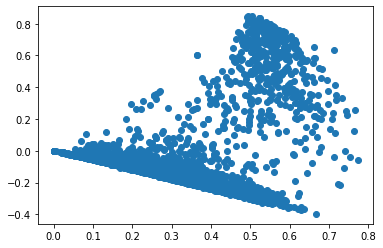

In [72]:
import matplotlib.pyplot as plt

plt.scatter(red_two_X[:, 0], red_two_X[:, 1])